# Import Files

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

In [7]:
files = []

for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        file_dir = os.path.join(dirname, filename)
        files.append(file_dir)
        print(f"{os.path.join(dirname, filename)} added to files array")

data/2022-07-15-garbo11-combined-kml.csv added to files array
data/2022-07-07-garbo05-combined-kml.csv added to files array
data/2022-07-07-garbo11-combined-kml.csv:Zone.Identifier added to files array
data/2022-07-06-garbo05-combined-kml.csv:Zone.Identifier added to files array
data/2022-07-15-garbo01-combined-kml.csv:Zone.Identifier added to files array
data/2022-07-20-garbo11-combined-kml.csv:Zone.Identifier added to files array
data/2022-07-04-garbo06-combined-kml.csv added to files array
data/2022-07-06-garbo05-combined-kml.csv added to files array
data/2022-07-12-garbo10-combined-kml.csv added to files array
data/2022-07-21-garbo03-combined-kml.csv:Zone.Identifier added to files array
data/2022-07-15-garbo01-combined-kml.csv added to files array
data/2022-07-05-garbo10-combined-kml.csv:Zone.Identifier added to files array
data/2022-07-18-garbo04-combined-kml.csv added to files array
data/2022-07-11-garbo04-combined-kml.csv added to files array
data/2022-07-20-garbo06-combined-kml

In [8]:
# Combine all CSV files in the 'files' list into a single DataFrame and save as 'master_data5G.csv'
dfs = []
for f in files:
    if f.endswith('.csv'):
        try:
            df = pd.read_csv(f)
            dfs.append(df)
        except Exception as e:
            print(f"Error reading {f}: {e}")

if dfs:
    master_df = pd.concat(dfs, ignore_index=True)
    master_df.to_csv('data/master_data5G.csv', index=False)
    print("Combined CSV saved as data/master_data5G.csv")
else:
    print("No CSV files found to combine.")

/tmp/ipykernel_4559/1386987572.py:6: DtypeWarning: Columns (1,8,12,17,19,21,24,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_4559/1386987572.py:6: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_4559/1386987572.py:6: DtypeWarning: Columns (1,8,12,17,19,21,24,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_4559/1386987572.py:6: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_4559/1386987572.py:6: DtypeWarning: Columns (1,8,12,17,19,21,24,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_4559/1386987572.py:6: DtypeWarning: Columns (1,8,12,17,19,21,22,23,24,25,27,29,31) have mixed t

Combined CSV saved as data/master_data5G.csv


# Data Ingestion & Cleaning

In [9]:
data5G = pd.read_csv("data/master_data5G.csv", low_memory=False)

In [10]:
data5G = data5G[(data5G['latitude'] != 99999) & (data5G['longitude'] != 99999)] #99,999 is used for invalid detection

#Parse timestamps 
data5G['time'] = pd.to_datetime(data5G['time'], unit='s', errors='coerce') #Removes invalid values (abc) and converts numeric values into time and date
data5G = data5G.dropna(subset=['time']) #Removes rows with invalid timestamps

data5G.to_csv("data/clean_master.csv", index=False)

In [2]:
df = pd.read_csv("data/clean_master.csv", low_memory=False)

In [ ]:
df.info()

df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3070690 entries, 0 to 3070689
Data columns (total 32 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   Day               object 
 2   Year              float64
 3   Month             float64
 4   Date              float64
 5   hour              float64
 6   min               float64
 7   sec               float64
 8   timezone          object 
 9   latitude          float64
 10  longitude         float64
 11  speed             float64
 12  truck             object 
 13  svr1              float64
 14  svr2              float64
 15  svr3              float64
 16  svr4              float64
 17  Role              object 
 18  Transfer size     float64
 19  Transfer unit     object 
 20  Bitrate           float64
 21  bitrate_unit      object 
 22  Retransmissions   object 
 23  CWnd              object 
 24  cwnd_unit         object 
 25  Role-RX           object 
 26  Transfer size-

,time,Day,Year,Month,Date,hour,min,sec,timezone,latitude,...,Retransmissions,CWnd,cwnd_unit,Role-RX,Transfer size-RX,Transfer unit-RX,Bitrate-RX,bitrate_unit-RX,send_data,square_id
count,3070690,2726024,2726024.0,2726024.0,2.726024e+06,2.726023e+06,2.726023e+06,2.726023e+06,2726023,2.726021e+06,...,2739536,2739533,2741368,2741294,2.741292e+06,2741295,2.741292e+06,2741295,2.817145e+06,2508077
unique,592403,5,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,712,819,1,3,NaN,1,NaN,1,NaN,298
top,2022-07-08 01:47:11,Mon,NaN,NaN,NaN,NaN,NaN,NaN,AEST,NaN,...,0.0,0.0,MBytes,RX-C,NaN,MBytes,NaN,Mbits/sec,NaN,square_111669149768
freq,47,617541,NaN,NaN,NaN,NaN,NaN,NaN,2726021,NaN,...,1984789,999416,2741368,2739462,NaN,2741295,NaN,2741295,NaN,82522
mean,NaN,NaN,2022.0,7.0,1.210755e+01,8.818509e+00,2.961779e+01,2.948952e+01,NaN,-2.743018e+01,...,NaN,NaN,NaN,NaN,2.011361e+00,NaN,1.687096e+01,NaN,2.967548e-01,NaN
std,NaN,NaN,0.0,0.0,6.046087e+00,2.308706e+00,1.745384e+01,1.731670e+01,NaN,3.612849e+01,...,NaN,NaN,NaN,NaN,1.987320e+00,NaN,1.657257e+01,NaN,9.297175e-01,NaN
min,NaN,NaN,2022.0,7.0,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,NaN,-3.782882e+01,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
25%,NaN,NaN,2022.0,7.0,6.000000e+00,7.000000e+00,1.400000e+01,1.400000e+01,NaN,-3.778155e+01,...,NaN,NaN,NaN,NaN,7.451172e-01,NaN,6.250000e+00,NaN,0.000000e+00,NaN
50%,NaN,NaN,2022.0,7.0,1.200000e+01,9.000000e+00,3.000000e+01,2.900000e+01,NaN,-3.775127e+01,...,NaN,NaN,NaN,NaN,1.470000e+00,NaN,1.230000e+01,NaN,2.733326e-02,NaN
75%,NaN,NaN,2022.0,7.0,1.800000e+01,1.100000e+01,4.500000e+01,4.400000e+01,NaN,-3.771734e+01,...,NaN,NaN,NaN,NaN,2.900000e+00,NaN,2.430000e+01,NaN,2.599812e-01,NaN


: 

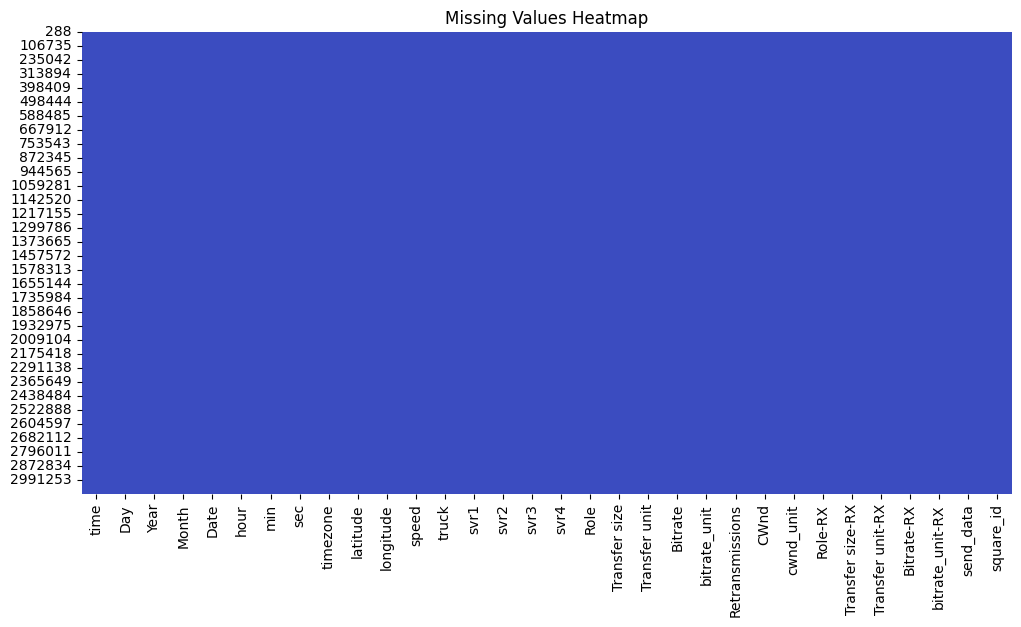

In [5]:
#Visual heatmap of missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm") #Red = Missing, Blue = Present
plt.title("Missing Values Heatmap")
plt.show()

## Remove Missing Values

In [3]:
df = df.dropna()

In [4]:
df.to_csv("clean_data/Master5G.csv", index=False)

In [2]:
df = pd.read_csv("clean_data/Master5G.csv", low_memory=False)